In [10]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np

In [17]:
(digits_x, digits_y) = load_digits(return_X_y = True)
# Scale the input to the range <0, 1>
digits_x = digits_x / np.max(digits_x)
scaler = StandardScaler()
scaler.fit(digits_x)
preprocessed_x = scaler.transform(digits_x)
train_x, test_x, train_y, test_y = train_test_split(preprocessed_x, digits_y)

In [4]:
import matplotlib.pyplot as plt

In [126]:
mlp = MLPClassifier(hidden_layer_sizes=(16, 16, 16), activation="relu", solver="lbfgs")
mlp.fit(train_x, train_y)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(16, 16, 16), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [127]:
from sklearn.metrics import accuracy_score
print(accuracy_score(mlp.predict(test_x), test_y))

0.9711111111111111


In [21]:
mlp.coefs_[0].shape

(64, 16)

In [7]:
def to_fixed(n):
    return np.uint16(round(n * 2048))
import struct
def output_row(r):
    xs = [to_fixed(n) for n in r]
    xs = ["%04x" % x for x in xs]
    s = "".join([(xs[i+1] if i+1 < len(xs) else "0000") + xs[i] for i in range(0, len(xs), 2)])
    s = s + "0" * (16 * 4 - len(s))
    s = ", ".join(["0x" + s[i:i+8] for i in range(0, len(s), 8)])
    return "dat " + s


In [146]:
import math
for (layer, (coefs, bias)) in enumerate(zip(mlp.coefs_, mlp.intercepts_)):
    for part in range(int(math.floor(coefs.shape[0]) / 16)):
        print(f"l{layer}_{part}:")
        for row in range(coefs.shape[1]):
            print(output_row(coefs[(part * 16):(part * 16 + 16) , row]))
    print("b" + str(layer) + ":")
    print(output_row(bias))
            

l0_0:
dat 0xfe9901e3, 0x026bfbb9, 0xfe380533, 0x0236ffe0, 0xfcc4fe6a, 0x004bfd05, 0xfddcfdee, 0xfe3a0067
dat 0x0215fec2, 0xff70fd7b, 0x02b3ff88, 0xfdcf024e, 0x003efdff, 0xfde2fa79, 0x00bd03ba, 0xfe0bfcd9
dat 0xfe49ff06, 0x027804ec, 0xfe5401d0, 0xfc81fc84, 0x04bdff70, 0x023e004f, 0x01a9091b, 0xfcf0fcec
dat 0xfe32fdec, 0xff8dfcf2, 0xf870ff1b, 0x0000fa99, 0xfd7effc2, 0x0091fc91, 0xfebefe05, 0xfe53fe47
dat 0xfcd6fed1, 0x038dfe71, 0x0058ff4d, 0xfe67fc36, 0xfce100d8, 0xfe5101be, 0x013cfc92, 0xff65ff4b
dat 0x01de00e0, 0x0126ffa8, 0xfe35007d, 0x007c0441, 0x00cfff10, 0x0132fe18, 0x002d04d3, 0x0304ffed
dat 0x017501e5, 0x010e004d, 0x0313fd85, 0x018303b0, 0x0041fe1d, 0x0298fd9c, 0x006f08ee, 0x012cff55
dat 0x0229fde8, 0xff2105bc, 0x035f0247, 0xff1304cf, 0xfeb6ffb8, 0x03a6003f, 0xfddc03cf, 0xffa4fc23
dat 0x0037fe84, 0x029cff0b, 0xfe610045, 0x00edfe32, 0xfe62feb9, 0xffeffe05, 0xf8f0014d, 0xffa3fd9f
dat 0xfd20000d, 0x00e6fcdb, 0x0037fcf8, 0xfe4dfecd, 0x0090fdd7, 0x00a7fd28, 0xfc37019b, 0x01c700d0
dat 

In [37]:
test_vec = digits_x[1]
buff = "dat "
for i in range(0, len(test_vec), 4):
    bytes = ["%02x" % int(x * 255) for x in test_vec[i:i+4]]
    bytes.reverse()
    buff += "0x" + "".join(bytes) + ", "
print(buff)

dat 0xbf000000, 0x00004fcf, 0xaf000000, 0x00008fff, 0xef2f0000, 0x00005fff, 0xffef6f00, 0x00001fff, 0xff0f0000, 0x00002fff, 0xff0f0000, 0x00005fff, 0xff0f0000, 0x00005fff, 0xaf000000, 0x00009fff, 


In [36]:
digits_y[1]

1

array([ 0.00000000e+00,  0.00000000e+00,  5.00000000e+00,  1.30000000e+01,
        1.60000000e+01,  1.40000000e+01,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  1.00000000e+00,  1.40000000e+01,  8.00000000e+00,
        5.00000000e+00,  1.60000000e+01,  2.00000000e+00, -1.38777878e-17,
        0.00000000e+00,  0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
        2.00000000e+00,  1.50000000e+01,  2.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  2.00000000e+00,
        8.00000000e+00,  1.50000000e+01,  3.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -8.88178420e-16,  1.50000000e+01,
        1.60000000e+01,  1.30000000e+01,  8.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  6.00000000e+00,
        1.40000000e+01,  0.00000000e+00,  0.00000000e+00,  3.46944695e-18,
        0.00000000e+00,  0.00000000e+00,  8.88178420e-16,  1.30000000e+01,
        7.00000000e+00,  

In [148]:
np.max(test_x)

42.379240200834595

In [149]:
test_y[0]

7

In [150]:
mlp.predict(test_vec.reshape(1, -1))

array([7])

In [151]:
def apply_layer(mat, vec, bias):
    x = vec @ mat
    assert len(x) == len(bias)
    for i in range(len(x)):
        x[i] += bias[i]
        if x[i] < 0:
            x[i] = 0
        if x[i] > 16:
            x[i] = 16
    return x

def predict(x, verbose=True):
    i = 0
    for (coef, bias) in zip(mlp.coefs_, mlp.intercepts_):
        if verbose:
            print("LAYER " + str(i) + ": " + str(x))
        i += 1
        x = apply_layer(coef, x, bias)
    if verbose:
        print("LAYER " + str(i) + ": " + str(x))
    return x

In [152]:
predict(test_vec)

LAYER 0: [ 0.         -0.33501649 -0.04308102  0.27407152  0.96867267  1.45072766
 -0.40972392 -0.12502292 -0.05907756 -0.31104676  0.66747815 -1.000748
 -1.1041557   1.29297554  0.04283835 -0.13043338 -0.04462507 -0.72764628
 -1.5649297  -1.20543167 -0.82570988  1.16109164  0.06488677 -0.11422184
 -0.03337973 -0.78510524 -1.46862699 -1.15984045 -0.31333031  1.26871488
  0.18512037 -0.04723238  0.         -0.67237227 -1.21260656  0.94599454
  0.96064411  0.72516137  1.43955804  0.         -0.06134367 -0.5312841
 -1.05283456 -0.19072006  1.01118593 -1.44653841 -0.79827225 -0.08874162
 -0.03543326 -0.40357499 -1.33033057  0.66228542 -0.45584681 -1.45261152
 -0.75743581 -0.20978513 -0.02359646 -0.29908135  0.28273565  0.43694362
 -2.39411016 -1.14664746 -0.5056698  -0.19600752]
LAYER 1: [0.24637769 0.         1.91018597 0.         0.         0.
 7.07629703 0.         1.56612026 0.         2.12539708 0.43961049
 0.         0.         1.6576177  0.        ]
LAYER 2: [0.         3.69212494 0

array([ 0.        ,  0.        ,  0.        ,  0.        , 10.05266086,
       12.04247161,  0.        , 16.        ,  0.        ,  7.11153284])

In [153]:
min(np.min(coefs) for coefs in mlp.coefs_)

-1.7666850060514885

In [154]:
max(np.max(coefs) for coefs in mlp.coefs_)

2.0728089954366506

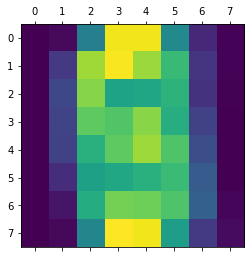

In [12]:
plt.matshow(scaler.mean_.reshape(8, 8))

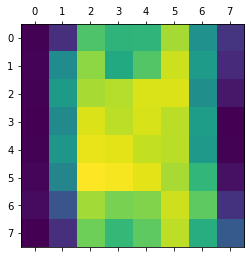

In [13]:
plt.matshow(scaler.scale_.reshape(8, 8))

In [20]:
for i in range(0, len(scaler.mean_), 16):
    print(f'm_{int(i/16)}:')
    print(output_row([-x for x in scaler.mean_[i:i+16]]))

m_0:
dat 0xffd90000, 0xfa15fd66, 0xfd1cfa13, 0xffefff52, 0xff01ffff, 0xfa03facf, 0xfbe9fadc, 0xfff2ff14
m_1:
dat 0xfeb30000, 0xfc81fb0c, 0xfc19fc73, 0xfffaff1b, 0xfec40000, 0xfb97fb74, 0xfc39fb09, 0x0000fed7
m_2:
dat 0xfed50000, 0xfb77fc2b, 0xfba1fad9, 0x0000fe8c, 0xff35ffff, 0xfc63fc8f, 0xfbe2fc2a, 0xfffdfe46
m_3:
dat 0xffa6ffff, 0xfb3bfc3f, 0xfb9ffb4b, 0xffe6fe23, 0xffdc0000, 0xf9f5fd39, 0xfc9efa18, 0xffd1fef7


In [19]:
for i in range(0, len(scaler.scale_), 16):
    print(f's_{int(i/16)}:')
    print(output_row([1.0 / x for x in scaler.scale_[i:i+16]]))

s_0:
dat 0x8d220800, 0x1e221aed, 0x16981ddd, 0x7b6c267f, 0x280f4ee1, 0x2031179e, 0x15271ac5, 0x9aa623b3
s_1:
dat 0x23cd04e5, 0x16111680, 0x14a914bb, 0x23ec2747, 0x28b1fef0, 0x15c414ad, 0x15cd14d0, 0x9c0d22bb
s_2:
dat 0x24ca0800, 0x146d143e, 0x15cf1594, 0x08002432, 0x2af071e0, 0x13e11395, 0x167b1474, 0xa0921d90
s_3:
dat 0x495372f1, 0x187f16af, 0x153b1826, 0x82111a07, 0x890a3390, 0x1d441917, 0x15b319f3, 0x44d51f4d
